In [1]:
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'./tweets_2019_lite.csv',
                 lineterminator='\n')
df.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,1080847344629878785,2019-01-03 15:24:22+00:00,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,2017-07-23 15:56:45+00:00,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,668,541
1,1080845616920625152,2019-01-03 15:17:30+00:00,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,2018-04-28 12:26:37+00:00,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,1,0
2,1080845503305342977,2019-01-03 15:17:03+00:00,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,2014-05-07 17:23:35+00:00,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,2410,482
3,1080844507501846530,2019-01-03 15:13:06+00:00,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,2009-05-31 21:20:11+00:00,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,16735,354
4,1080844257844449283,2019-01-03 15:12:06+00:00,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,2015-08-17 14:07:34+00:00,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,81,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94346 entries, 0 to 94345
Data columns (total 14 columns):
id_str                     94346 non-null int64
created_at                 94346 non-null object
full_text                  94346 non-null object
user.id_str                94346 non-null int64
user.screen_name           94346 non-null object
user.name                  94339 non-null object
user.created_at            94346 non-null object
user.description           85110 non-null object
user.profile_image_url     94341 non-null object
user.profile_banner_url    85247 non-null object
user.url                   38894 non-null object
user.statuses_count        94346 non-null int64
user.followers_count       94346 non-null int64
user.friends_count         94346 non-null int64
dtypes: int64(5), object(9)
memory usage: 10.1+ MB


In [4]:
df["user.created_at"] = df["user.created_at"].astype(str).str.split("+").str[0]
df["created_at"] = df["created_at"].astype(str).str.split("+").str[0]

In [5]:
my_format = '%Y-%m-%d %H:%M:%S'
df['user.created_at'] = pd.to_datetime(df['user.created_at'], format=my_format)
df['created_at'] = pd.to_datetime(df['created_at'], format=my_format)

In [6]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(df)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time
0,1080847344629878785,2019-01-03 15:24:22,"@camilawondcr Sim. E quem merece sobressair, v...",889152311704113152,ImMummRa,Яамои #HenryCavillSuperman,2017-07-23 15:56:45,DC - Marvel - Star Wars - The Dragon Prince (R...,http://pbs.twimg.com/profile_images/1209899835...,https://pbs.twimg.com/profile_banners/88915231...,NaN,13946,668,541,2019-01-03,15:24:22,2017-07-23,15:56:45
1,1080845616920625152,2019-01-03 15:17:30,@k_rad @DVATW With abusive women like amber h...,990205643532521472,anike34t,anike34t,2018-04-28 12:26:37,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,187,1,0,2019-01-03,15:17:30,2018-04-28,12:26:37
2,1080845503305342977,2019-01-03 15:17:03,"Primer Jueves del Año!! #FelizJueves!\nAl ""Hav...",2482498394,VistarMagazine,Vistar Magazine,2014-05-07 17:23:35,Twitter oficial de Vistar Magazine. Reflejamos...,http://pbs.twimg.com/profile_images/1385584253...,https://pbs.twimg.com/profile_banners/24824983...,https://t.co/MRIcyRTvWM,3037,2410,482,2019-01-03,15:17:03,2014-05-07,17:23:35
3,1080844507501846530,2019-01-03 15:13:06,"""I Was Petrified of the Monster"": Johnny Depp,...",43758124,THREsq,THR Esq.,2009-05-31 21:20:11,Entertainment law news and comment from The Ho...,http://pbs.twimg.com/profile_images/5839853005...,NaN,http://t.co/aOrsEZkxFC,8346,16735,354,2019-01-03,15:13:06,2009-05-31,21:20:11
4,1080844257844449283,2019-01-03 15:12:06,"Johnny Depp, Amber Heard Legal Documents Shed ...",3317756286,EntMediaNews,Nigel Guest,2015-08-17 14:07:34,NaN,http://pbs.twimg.com/profile_images/6333688730...,NaN,NaN,118806,81,5,2019-01-03,15:12:06,2015-08-17,14:07:34
5,1080843777974128640,2019-01-03 15:10:12,"""I Was Petrified of the Monster"": Johnny Depp,...",72694283,chrispilz,Chris PIlz,2009-09-08 22:54:27,I am a nice sweet guy and a huge SPORTS FAN,http://pbs.twimg.com/profile_images/6258134093...,https://pbs.twimg.com/profile_banners/72694283...,NaN,337338,1409,5001,2019-01-03,15:10:12,2009-09-08,22:54:27
6,1080843742825889792,2019-01-03 15:10:04,This is an Amber Heard featuring red lipstick ...,270344378,LumkaTheElegant,ASK CARLOS 🏴‍☠️,2011-03-22 12:59:38,Mortal Kombat starring Hiroyuki Sanada as Scor...,http://pbs.twimg.com/profile_images/1383697153...,https://pbs.twimg.com/profile_banners/27034437...,https://t.co/Fr7zCHGMhk,139988,2137,747,2019-01-03,15:10:04,2011-03-22,12:59:38
7,1080843556649078784,2019-01-03 15:09:19,"Of many incredible details, Amber Heard has in...",89200008,eriqgardner,Eriq Gardner,2009-11-11 14:48:16,The Hollywood Reporter. @THREsq. Billboard. Fo...,http://pbs.twimg.com/profile_images/1378414663...,https://pbs.twimg.com/profile_banners/89200008...,https://t.co/rOctlZXJ2m,13107,10936,974,2019-01-03,15:09:19,2009-11-11,14:48:16
8,1080842492201877504,2019-01-03 15:05:05,"Johnny Depp, Amber Heard Legal Documents Shed ...",838526550660296704,drudge_tweeter,DrudgeTweeter,2017-03-05 23:08:03,Fresh updates as they happen.,http://pbs.twimg.com/profile_images/8385470734...,NaN,NaN,107947,133,1,2019-01-03,15:05:05,2017-03-05,23:08:03
9,1080842390645149702,2019-01-03 15:04:41,"Johnny Depp, Amber Heard Legal Documents Shed ...",28645214,drudgefeed,Drudge Report Feed,2009-04-03 20:27:04,Real-time updates of the Drudge Report. For t...,http://pbs.twimg.com/profile_images/1200693000...,NaN,http://t.co/H2OT3v6g8h,295868,13502,4,2019-01-03,15:04:41,2009-04-03,20:27:04


In [7]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['user_create_date'] = pd.to_datetime(df['user_create_date'])
df['user_create_time'] = pd.to_datetime(df['user_create_time'])

# Investigation about Tweets count over time

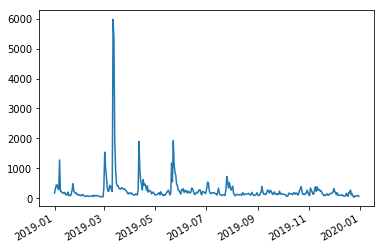

In [8]:
df['tweet_date'].value_counts().plot()

In [9]:
df['tweet_date'].value_counts()
df['tweet_date'].value_counts()

2019-03-12    5979
2019-03-13    5361
2019-05-23    1924
2019-03-14    1912
2019-04-12    1895
2019-03-02    1539
2019-01-07    1278
2019-05-21    1176
2019-05-24    1129
2019-03-03    1018
2019-03-15     979
2019-04-13     943
2019-05-25     872
2019-05-26     766
2019-03-04     734
2019-07-26     729
2019-04-17     621
2019-04-14     573
2019-07-27     564
2019-05-22     548
2019-07-03     540
2019-07-29     525
2019-07-04     522
2019-03-16     509
2019-01-23     491
2019-04-19     473
2019-04-15     472
2019-05-27     458
2019-01-04     447
2019-01-03     437
              ... 
2019-12-13      79
2019-12-12      78
2019-12-28      78
2019-12-26      77
2019-02-18      75
2019-10-05      75
2019-02-20      74
2019-02-14      73
2019-02-08      73
2019-10-07      72
2019-02-23      69
2019-02-13      68
2019-12-24      68
2019-12-27      66
2019-02-06      66
2019-12-14      66
2019-02-10      66
2019-12-18      63
2019-02-27      63
2019-12-31      62
2019-02-11      62
2019-02-12  

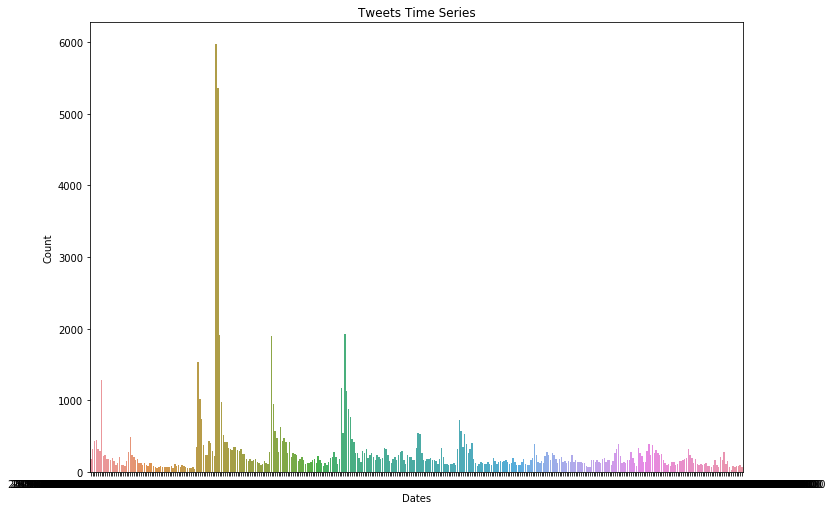

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'tweet_date', data = df)
plt.xlabel('Dates')
plt.ylabel('Count')
plt.title('Tweets Time Series')
plt.show()

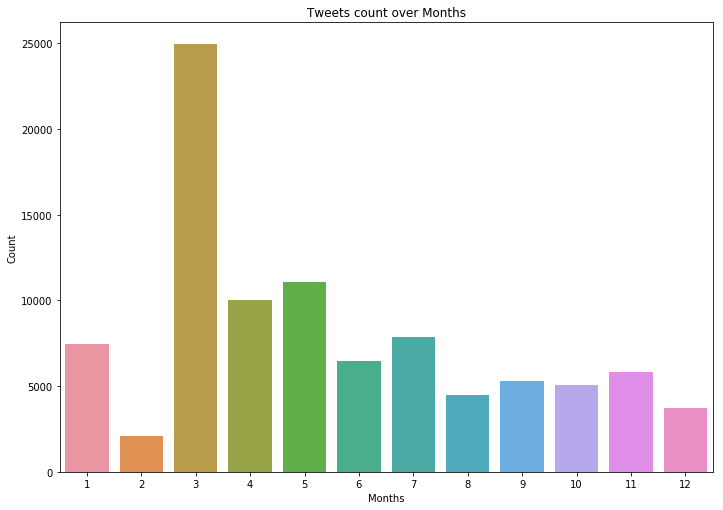

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_date'].dt.month, data = df)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Tweets count over Months')
plt.show()

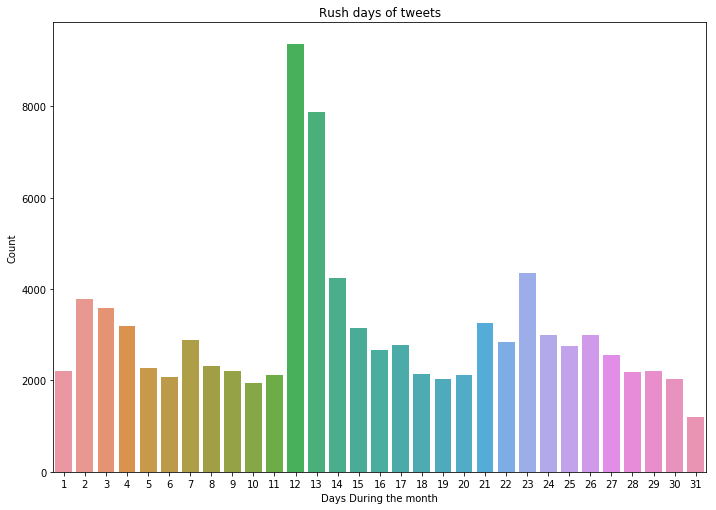

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_date'].dt.day, data = df)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show()

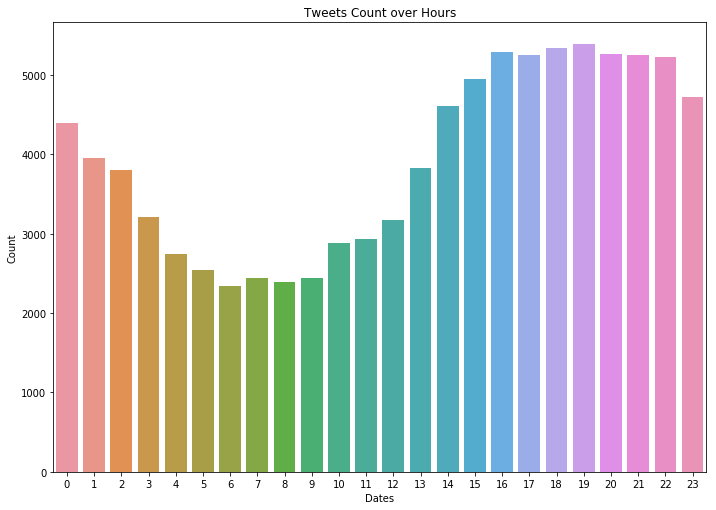

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = df['tweet_time'].dt.hour, data = df)
plt.xlabel('Dates')
plt.ylabel('Count')
plt.title('Tweets Count over Hours')
plt.show()

# Investigation on users Created Over Time

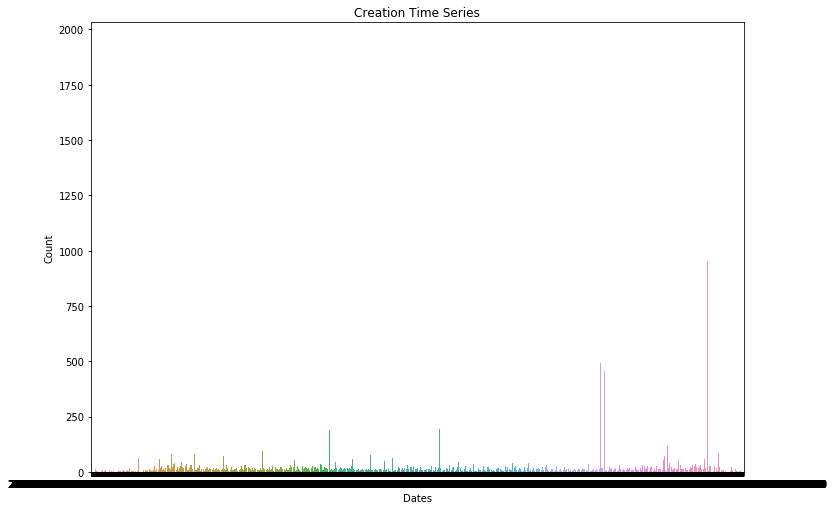

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'user_create_date', data = df)
plt.xlabel('Dates')
plt.ylabel('Count')
plt.title('Creation Time Series')
plt.show()

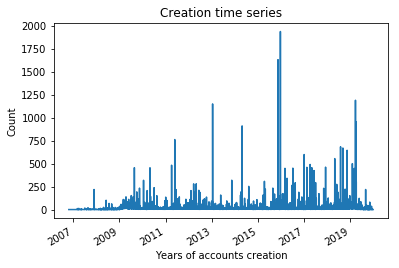

In [15]:
df['user_create_date'].value_counts().plot()
plt.xlabel('Years of accounts creation')
plt.ylabel('Count')
plt.title('Creation time series');

In [16]:
users_cre_19 = df[df['user_create_date'].dt.year == 2019]


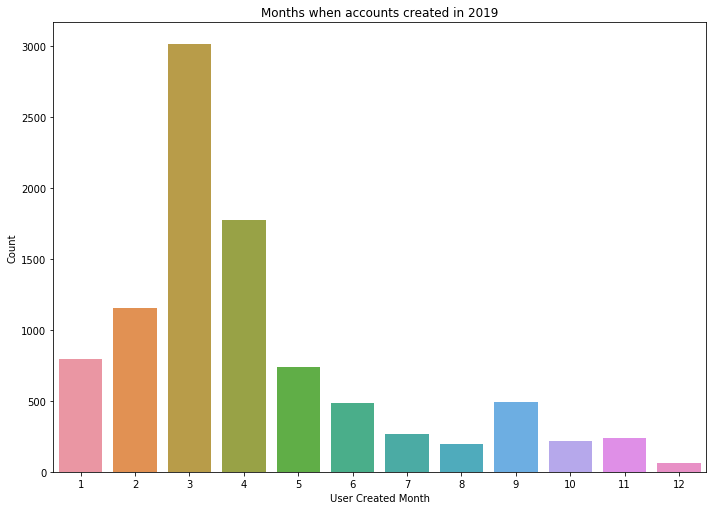

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_19['user_create_date'].dt.month, data = df)
plt.xlabel('User Created Month')
plt.ylabel('Count')
plt.title('Months when accounts created in 2019')
plt.show()

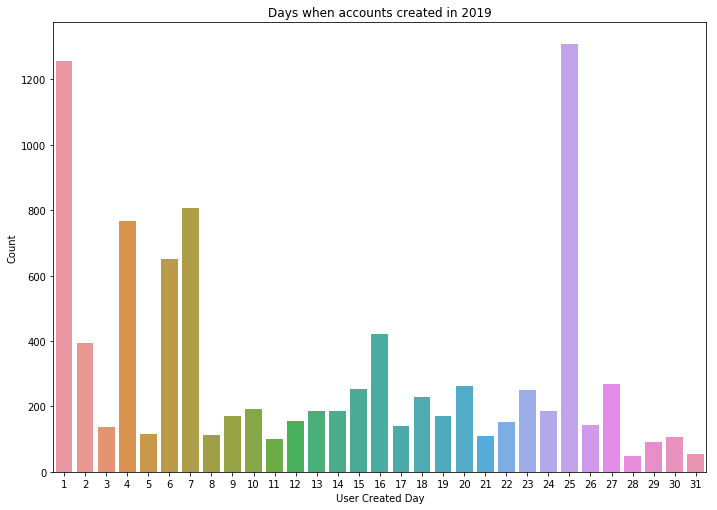

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_19['user_create_date'].dt.day, data = df)
plt.xlabel('User Created Day')
plt.ylabel('Count')
plt.title('Days when accounts created in 2019')

plt.show()

# Investigate tweets of Users created at 2019 

In [19]:
users_cre_19

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time
92,1080757757454606336,2019-01-03 09:28:23,@realamberheard I love mera and amber heard,1080476186235400192,Timothy18051484,Timothy Lin,2019-01-02 14:49:31,NaN,http://pbs.twimg.com/profile_images/1175385936...,NaN,NaN,21,6,67,2019-01-03,2021-06-25 09:28:23,2019-01-02,2021-06-25 14:49:31
255,1080802874915991552,2019-01-03 12:27:40,Johnny Depp Claims Ex Amber Heard ‘Play-Acted’...,1080772351451713536,Freelnk1,Freelnk,2019-01-03 10:26:23,All About Your Life!,http://pbs.twimg.com/profile_images/1080773207...,NaN,NaN,289,0,2,2019-01-03,2021-06-25 12:27:40,2019-01-03,2021-06-25 10:26:23
268,1080689639877496832,2019-01-03 04:57:43,AMBER HEARD OPENING DAY 3 LKUigKKKjJKjkjuu77,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-25 04:57:43,2019-01-03,2021-06-25 04:03:07
270,1080689021788004357,2019-01-03 04:55:15,@puchicoochie yet Amber heard opening day 3 😴,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-25 04:55:15,2019-01-03,2021-06-25 04:03:07
464,1085594521793191936,2019-01-16 17:47:58,Amber Heard - eu realmente amo essa mulher htt...,1085556719722381314,Karaalho,Mulheres que eu comeria até morrer,2019-01-16 15:17:45,(+18)🚩Postamos fotos de mulheres que são o son...,http://pbs.twimg.com/profile_images/1085558276...,https://pbs.twimg.com/profile_banners/10855567...,NaN,12,45,359,2019-01-16,2021-06-25 17:47:58,2019-01-16,2021-06-25 15:17:45
502,1085356117725564928,2019-01-16 02:00:38,"Parece, mas não é! A atriz Amber Heard lembra ...",1085353559103864832,SosiasAon,Sósias.aon,2019-01-16 01:50:28,Se parece com algum famoso ? Nos envie sua sug...,http://pbs.twimg.com/profile_images/1085530732...,https://pbs.twimg.com/profile_banners/10853535...,NaN,79,0,2,2019-01-16,2021-06-25 02:00:38,2019-01-16,2021-06-25 01:50:28
716,1082082570391744512,2019-01-07 01:12:43,#GoldenGlobes Nos Siga.\nAmber Heard maravilho...,1081410521369399298,MUNDONERDEPOP1,MUNDO NERD E POP,2019-01-05 04:42:14,NaN,http://pbs.twimg.com/profile_images/1083083396...,https://pbs.twimg.com/profile_banners/10814105...,https://t.co/8e8o6ymmaa,136,18,23,2019-01-07,2021-06-25 01:12:43,2019-01-05,2021-06-25 04:42:14
735,1082080412124528645,2019-01-07 01:04:08,#GloboDeOuro Nos Siga.\nAmber Heard nossa Mera...,1081410521369399298,MUNDONERDEPOP1,MUNDO NERD E POP,2019-01-05 04:42:14,NaN,http://pbs.twimg.com/profile_images/1083083396...,https://pbs.twimg.com/profile_banners/10814105...,https://t.co/8e8o6ymmaa,136,18,23,2019-01-07,2021-06-25 01:04:08,2019-01-05,2021-06-25 04:42:14
863,1082069506434916352,2019-01-07 00:20:48,"Amber heard es tan hermosa, no mamen",1082025267982290944,bloodybiebr,f loves a,2019-01-06 21:25:01,"it was you, and me, and miles kane",http://pbs.twimg.com/profile_images/1382174823...,https://pbs.twimg.com/profile_banners/10820252...,https://t.co/0RRotYnWRZ,8138,649,780,2019-01-07,2021-06-25 00:20:48,2019-01-06,2021-06-25 21:25:01
1179,1082108374928556032,2019-01-07 02:55:15,can we please talk about AMBER HEARD??????????...,1081744372708896768,hoshincel,leti,2019-01-06 02:48:51,NaN,http://pbs.twimg.com/profile_images/1158919719...,https://pbs.twimg.com/profile_banners/10817443...,https://t.co/tuqu1dL84L,8232,238,122,2019-01-07,2021-06-25 02:55:15,2019-01-06,2021-06-25 02:48:51


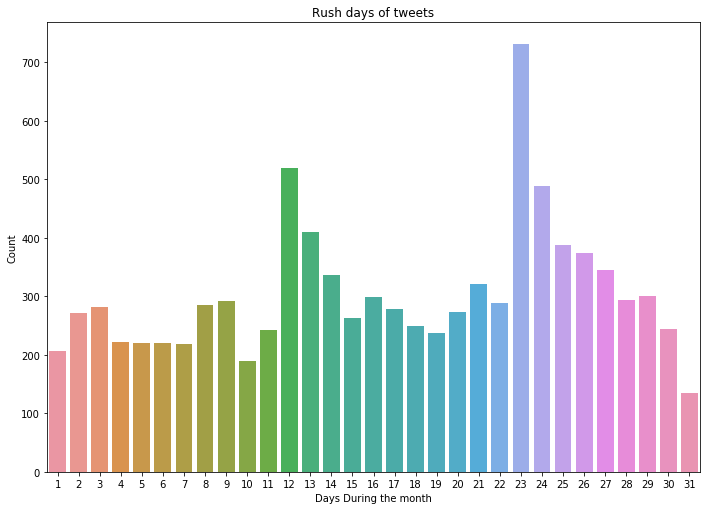

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_19['tweet_date'].dt.day, data = df)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show()

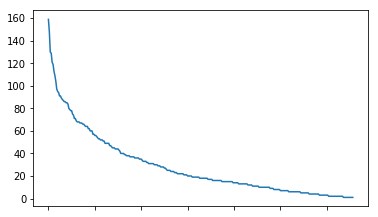

In [21]:
(users_cre_19['user_create_date']-users_cre_19['tweet_date']).value_counts().plot()

In [22]:
users_cre_19['diff'] = abs(users_cre_19['user.created_at'] - users_cre_19['created_at'])
users_cre_19["days_diff"] = users_cre_19["diff"].astype(str).str.split(" ").str[0]
users_cre_19["time_diff"] = users_cre_19["diff"].astype(str).str.split(" ").str[2]
users_cre_19.drop(['diff'], axis=1, inplace=True)
users_cre_19

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,tweet_date,tweet_time,user_create_date,user_create_time,days_diff,time_diff
92,1080757757454606336,2019-01-03 09:28:23,@realamberheard I love mera and amber heard,1080476186235400192,Timothy18051484,Timothy Lin,2019-01-02 14:49:31,NaN,http://pbs.twimg.com/profile_images/1175385936...,NaN,NaN,21,6,67,2019-01-03,2021-06-25 09:28:23,2019-01-02,2021-06-25 14:49:31,0,18:38:52.000000000
255,1080802874915991552,2019-01-03 12:27:40,Johnny Depp Claims Ex Amber Heard ‘Play-Acted’...,1080772351451713536,Freelnk1,Freelnk,2019-01-03 10:26:23,All About Your Life!,http://pbs.twimg.com/profile_images/1080773207...,NaN,NaN,289,0,2,2019-01-03,2021-06-25 12:27:40,2019-01-03,2021-06-25 10:26:23,0,02:01:17.000000000
268,1080689639877496832,2019-01-03 04:57:43,AMBER HEARD OPENING DAY 3 LKUigKKKjJKjkjuu77,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-25 04:57:43,2019-01-03,2021-06-25 04:03:07,0,00:54:36.000000000
270,1080689021788004357,2019-01-03 04:55:15,@puchicoochie yet Amber heard opening day 3 😴,1080675902667792389,kellyprice411,stream hiadtfawlmthbihi💋,2019-01-03 04:03:07,"juts as i thought, gaga ☮️dc stan👠",http://pbs.twimg.com/profile_images/1080677292...,https://pbs.twimg.com/profile_banners/10806759...,NaN,73,3,28,2019-01-03,2021-06-25 04:55:15,2019-01-03,2021-06-25 04:03:07,0,00:52:08.000000000
464,1085594521793191936,2019-01-16 17:47:58,Amber Heard - eu realmente amo essa mulher htt...,1085556719722381314,Karaalho,Mulheres que eu comeria até morrer,2019-01-16 15:17:45,(+18)🚩Postamos fotos de mulheres que são o son...,http://pbs.twimg.com/profile_images/1085558276...,https://pbs.twimg.com/profile_banners/10855567...,NaN,12,45,359,2019-01-16,2021-06-25 17:47:58,2019-01-16,2021-06-25 15:17:45,0,02:30:13.000000000
502,1085356117725564928,2019-01-16 02:00:38,"Parece, mas não é! A atriz Amber Heard lembra ...",1085353559103864832,SosiasAon,Sósias.aon,2019-01-16 01:50:28,Se parece com algum famoso ? Nos envie sua sug...,http://pbs.twimg.com/profile_images/1085530732...,https://pbs.twimg.com/profile_banners/10853535...,NaN,79,0,2,2019-01-16,2021-06-25 02:00:38,2019-01-16,2021-06-25 01:50:28,0,00:10:10.000000000
716,1082082570391744512,2019-01-07 01:12:43,#GoldenGlobes Nos Siga.\nAmber Heard maravilho...,1081410521369399298,MUNDONERDEPOP1,MUNDO NERD E POP,2019-01-05 04:42:14,NaN,http://pbs.twimg.com/profile_images/1083083396...,https://pbs.twimg.com/profile_banners/10814105...,https://t.co/8e8o6ymmaa,136,18,23,2019-01-07,2021-06-25 01:12:43,2019-01-05,2021-06-25 04:42:14,1,20:30:29.000000000
735,1082080412124528645,2019-01-07 01:04:08,#GloboDeOuro Nos Siga.\nAmber Heard nossa Mera...,1081410521369399298,MUNDONERDEPOP1,MUNDO NERD E POP,2019-01-05 04:42:14,NaN,http://pbs.twimg.com/profile_images/1083083396...,https://pbs.twimg.com/profile_banners/10814105...,https://t.co/8e8o6ymmaa,136,18,23,2019-01-07,2021-06-25 01:04:08,2019-01-05,2021-06-25 04:42:14,1,20:21:54.000000000
863,1082069506434916352,2019-01-07 00:20:48,"Amber heard es tan hermosa, no mamen",1082025267982290944,bloodybiebr,f loves a,2019-01-06 21:25:01,"it was you, and me, and miles kane",http://pbs.twimg.com/profile_images/1382174823...,https://pbs.twimg.com/profile_banners/10820252...,https://t.co/0RRotYnWRZ,8138,649,780,2019-01-07,2021-06-25 00:20:48,2019-01-06,2021-06-25 21:25:01,0,02:55:47.000000000
1179,1082108374928556032,2019-01-07 02:55:15,can we please talk about AMBER HEARD??????????...,1081744372708896768,hoshincel,leti,2019-01-06 02:48:51,NaN,http://pbs.twimg.com/profile_images/1158919719...,https://pbs.twimg.com/profile_banners/10817443...,https://t.co/tuqu1dL8

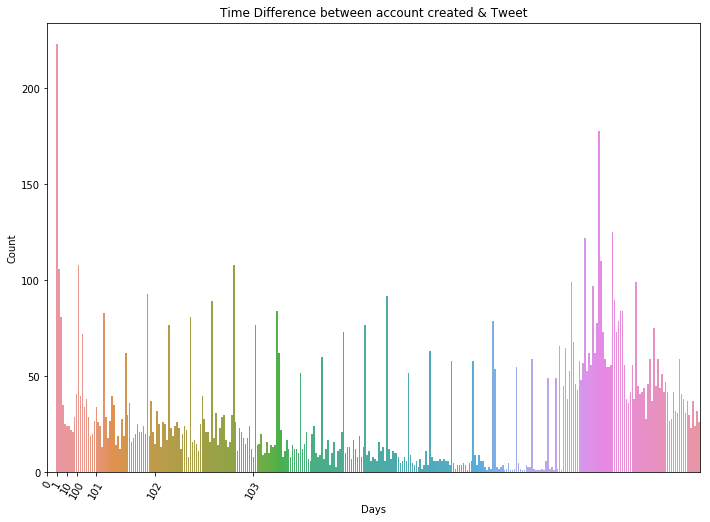

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'days_diff', data = users_cre_19)

plt.xticks([ -5, 0,5,10,20,50,100,],rotation=60)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Time Difference between account created & Tweet')
plt.show()

In [46]:
users_cre_19['days_diff'].value_counts().sort_values()

353      1
297      1
304      1
336      1
315      1
323      1
287      1
307      1
328      1
314      1
308      1
324      1
326      1
309      2
305      2
347      2
330      2
281      2
327      2
266      2
311      2
322      2
301      2
299      2
319      3
296      3
300      3
298      3
331      3
264      3
      ... 
60      73
23      73
78      75
15      77
19      77
24      77
51      78
3       79
61      79
10      81
16      81
12      83
63      84
62      84
2       84
17      89
6       90
25      92
14      93
5       97
7       99
4       99
1      106
18     108
108    108
53     110
46     122
59     125
52     178
0      223
Name: days_diff, Length: 328, dtype: int64

In [24]:
(users_cre_19['user_create_date']-users_cre_19['tweet_date']).value_counts()

0 days       159
-53 days     148
-52 days     130
-1 days      129
-59 days     121
-46 days     119
-108 days    113
-19 days     109
-6 days      104
-13 days      97
-25 days      95
-5 days       94
-54 days      91
-60 days      91
-7 days       89
-8 days       88
-15 days      87
-63 days      86
-2 days       86
-3 days       85
-18 days      85
-16 days      84
-62 days      80
-78 days      79
-17 days      78
-4 days       78
-11 days      75
-26 days      74
-20 days      71
-49 days      71
            ... 
-306 days      3
-233 days      3
-286 days      3
-309 days      2
-317 days      2
-284 days      2
-322 days      2
-328 days      2
-299 days      2
-298 days      2
-305 days      2
-300 days      2
-312 days      2
-319 days      2
-308 days      2
-311 days      2
-348 days      2
-324 days      2
-318 days      2
-336 days      1
-288 days      1
-315 days      1
-320 days      1
-281 days      1
-330 days      1
-295 days      1
-353 days      1
-296 days     